In [9]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize
x_train /= 255
x_test /= 255

num_classes = 10
model = keras.Sequential(
    [
        layers.Dense(32, input_shape=(28 * 28,), activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 40

history = model.fit(x_train, y_train,epochs=epochs,validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4808 - accuracy: 0.8574 - val_loss: 0.2575 - val_accuracy: 0.9283
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2313 - accuracy: 0.9346 - val_loss: 0.2028 - val_accuracy: 0.9408
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1849 - accuracy: 0.9469 - val_loss: 0.1838 - val_accuracy: 0.9474
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1579 - accuracy: 0.9533 - val_loss: 0.1725 - val_accuracy: 0.9517
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1383 - accuracy: 0.9594 - val_loss: 0.1557 - val_accuracy: 0.9570
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1232 - accuracy: 0.9640 - val_loss: 0.1585 - val_accuracy: 0.9541
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1108 - accuracy: 0.9667 - val_loss: 0.1677 - val_accuracy:

Test loss: 0.18171897530555725
Test accuracy:  % 96.24000191688538


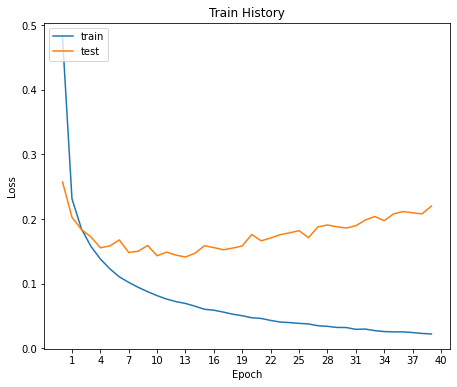

In [11]:
def show_train_history(train_history):
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.xticks(range(1,41,3))
    plt.ylabel("Loss")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()

scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:  %', 100*acc)
show_train_history(history)

In [12]:
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X /255.0
x_train, x_test, y_train, y_test = X[:60000], X[60000:70000], y[:60000], y[60000:70000]
C_reg = 1

classifier_reg = svm.SVC(C=C_reg,gamma="auto")
classifier_reg.fit(x_train, y_train)
classifier_predicted_reg = classifier_reg.predict(x_test)

print("SVM:  %", 100*metrics.accuracy_score(y_test, classifier_predicted_reg), "\n")

SVM with regularization accuracy:  % 94.46 



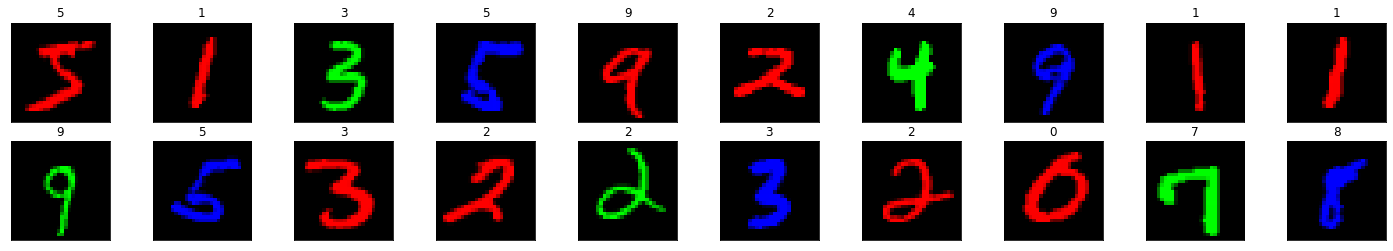

In [19]:
import numpy as np
import pandas as pd


rgb = [0,0,0]
for i in range(3):
    dim = np.zeros((np.array_split(x_train*255, 3)[i].shape[0], 28, 28))
    if i == 0:
        rgb[i] = np.stack((np.array_split(x_train*255, 3)[i].reshape(np.array_split(x_train*255, 3)[i].shape[0], 28, 28), dim, dim), axis = 3)
    if i == 1:
        rgb[i] = np.stack((dim, np.array_split(x_train*255, 3)[i].reshape(np.array_split(x_train*255, 3)[i].shape[0], 28, 28), dim), axis = 3)
    if i == 2:
        rgb[i] = np.stack((dim, dim, np.array_split(x_train*255, 3)[i].reshape(np.array_split(x_train*255, 3)[i].shape[0], 28, 28)), axis = 3)

mnist_rgb = np.concatenate((rgb[0], rgb[1], rgb[2]))


fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    images = mnist_rgb[15000*(idx%4):(15000)*(idx%4)+20]
    labels = y_train[15000*(idx%4):(15000)*(idx%4)+20]
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx]/255)
    ax.set_title(str(labels[idx].item()))
